<a href="https://colab.research.google.com/github/cecilylynn/TooHotToHandleS05-DataProjects/blob/main/Data_Exploration_and_Visualization_of_THTHS05_Follower_Counts_24_Hours_After_Drop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the [THTH Data Collection Notebook](https://github.com/cecilylynn/data-science-projects/blob/main/Data_Collection_THTHS05.ipynb), I gathered the Instagram follower counts for each contestant and the @TooHotNetflix account each hour from 2am EST the day that episodes 1-4 were dropped until 2am the following day. This data was arranged as a pandas data frame where the time column gives the number of hours since the initial reading and each additional column contains the hourly follower counts of the specified account. This was exported as a CSV which we will now read in for analysis.

##Setting Up

In [1]:
#my usual data science toolbox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#let's read in our data:
from google.colab import drive
drive.mount('/content/drive')

# Read in the csv file
first24_df = pd.read_csv('/content/drive/My Drive/Python/THTH Season 5/follower_counts_first_24_hours.csv')

#and copy our palette from the other notebook to use in our visualizations, set it as our seaborn palette
thth_palette = {'magenta': '#fb04cb', 'green': '#89ef1c', 'purple':'#9412f2', 'aqua': '#04fbfb', 'blue': '#5101f8', 'white': '#FFFFFF', 'yellow': '#fffe20','magenta': '#fb04cb', 'green': '#89ef1c', 'purple':'#9412f2', 'aqua': '#04fbfb', 'blue': '#5101f8', 'white': '#FFFFFF', 'yellow': '#fffe20'}
sns.set_palette(thth_palette)

Mounted at /content/drive


In [3]:
#use Time as the index
first24_df.set_index('Time', inplace = True)

first24_df.head()

,Dre,Isaac,Alex,Christine,Courtney,Elys,Hannah,Hunter,Louis,Megan,Too Hot
Time,,,,,,,,,,,
0,4473,25470,18376,34455,111090,19631,302740,19204,62520,15459,654723
1,4475,25471,18379,34457,111100,19633,302737,19205,62527,15462,654734
2,4491,25502,18391,34481,111125,19680,302781,19211,62567,15495,654671
3,4516,25551,18411,34528,111162,19761,302832,19222,62651,15540,654650
4,4529,25607,18422,34582,111193,19867,302899,19229,62765,15586,654644


##Charting Number of Follwers Hourly

Now let's do some basic exploration to get a feel for this data. To get started, let's just visualize the changes all the accounts.

<Axes: xlabel='Time'>

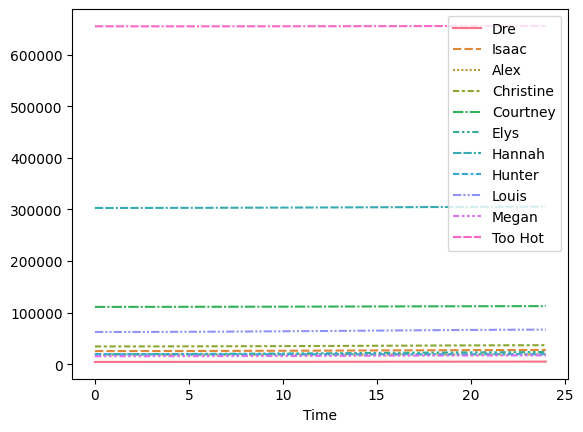

In [4]:
sns.lineplot(data=first24_df)

This visulization doesn't help much since Hannah and @tooHotNetflix have so many more followers than the others. Let's take them out to see if we can get a better look.

<Axes: xlabel='Time'>

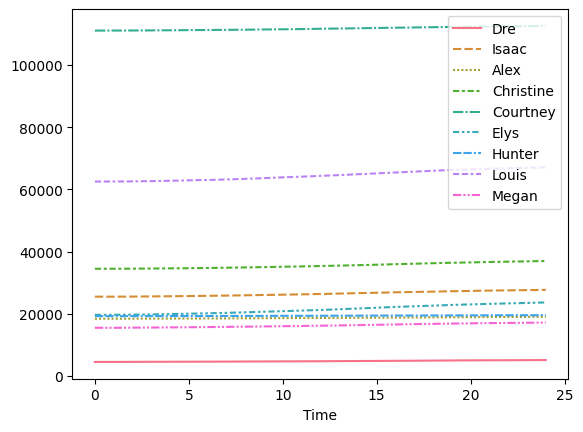

In [5]:
sns.lineplot(data=first24_df[[name for name in first24_df.columns if ((name != 'Hannah') and (name != 'Too Hot')) ]])

This is a little bit better. We can see that for the most part, popularity rankings as determined by number of Instagram followers are unchanged, but we notice that Elys started in the middle of the pack with Alex, Courtney, Hunter, Louis and Megan but ends up above all of them. Let's take a look at just her growth and zoom in on her growth compared to the others with similar initial follower counts:

<Axes: xlabel='Time', ylabel='Elys'>

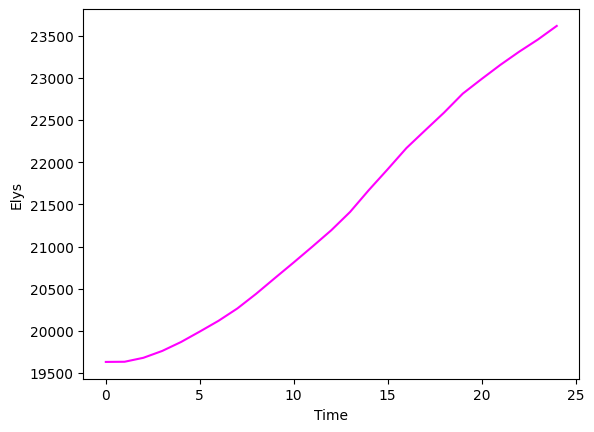

In [6]:
sns.lineplot(data=first24_df.Elys)

<Axes: xlabel='Time'>

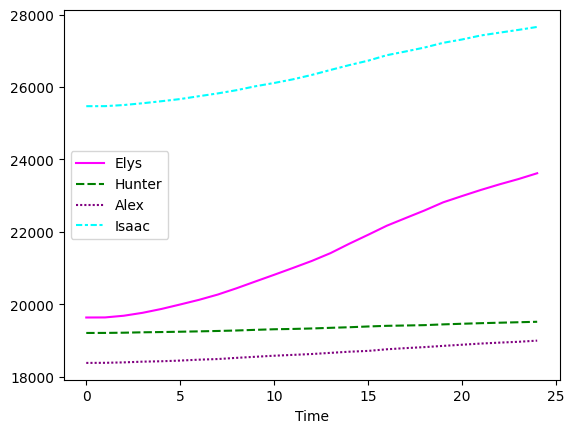

In [7]:
sns.lineplot(data=first24_df[['Elys', 'Hunter', 'Alex', 'Isaac']])

Wow! It's clear that Elys had a much faster rate of growth than the others. We'll pay special attention to her throughout our analysis.

We also see Alex catching up significantly to Hunter, while Hunter's follower count remains steady. Let's pay attention to these two as well.

Now let's take a closer look at some of the least popular contestants who started with similar numbers of followers

<Axes: xlabel='Time'>

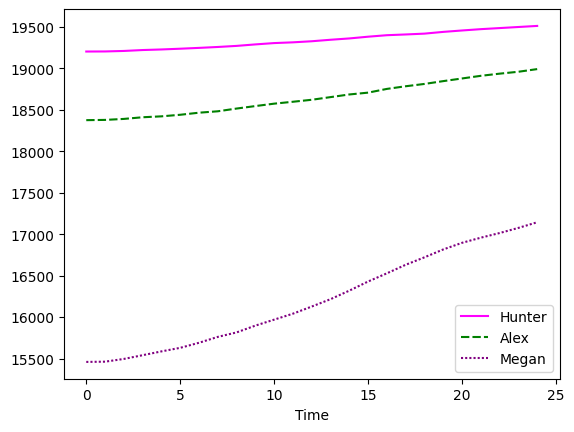

In [8]:
sns.lineplot(data=first24_df[['Hunter', 'Alex', 'Megan']])

It looks like Megan has the quickest growth, but nothing too exciting is happening here.

## Investigating Overall Raw Change and Percent Change

We'll look at the raw change and the percent change for each. To do this, we'll construct a data frame using list comprehension.

In [97]:
changes_df = pd.DataFrame({'Name': [name for name in first24_df.columns],
                           'init_count' : [(first24_df[name][0]) for name in first24_df.columns],
                           'raw_change' : [(first24_df[name][24]-first24_df[name][0]) for name in first24_df.columns],
                           'percent_change': [round(100*((first24_df[name][24]-first24_df[name][0])/ first24_df[name][0]),2) for name in first24_df.columns]})

In [98]:
changes_df

,Name,init_count,raw_change,percent_change
0,Dre,4473,604,13.50
1,Isaac,25470,2190,8.60
2,Alex,18376,616,3.35
3,Christine,34455,2488,7.22
4,Courtney,111090,1506,1.36
5,Elys,19631,3986,20.30
6,Hannah,302740,2549,0.84
7,Hunter,19204,309,1.61
8,Louis,62520,4572,7.31
9,Megan,15459,1685,10.90


We know from our exploration in our [Data Exploration and Visualization of Baseline Follower Counts THTHS05 notebook](https://colab.research.google.com/drive/1ZalIJe9XClS_-jr9OdcmcmiVc1iM072x?usp=sharing) that Hannah, Courtney, and Louis had the most followers 24 hours before the show released. Will this have a relationship to their changes in follower counts?

Who had the largest gain in followers? Let's sort by raw change.

<Axes: xlabel='Name', ylabel='raw_change'>

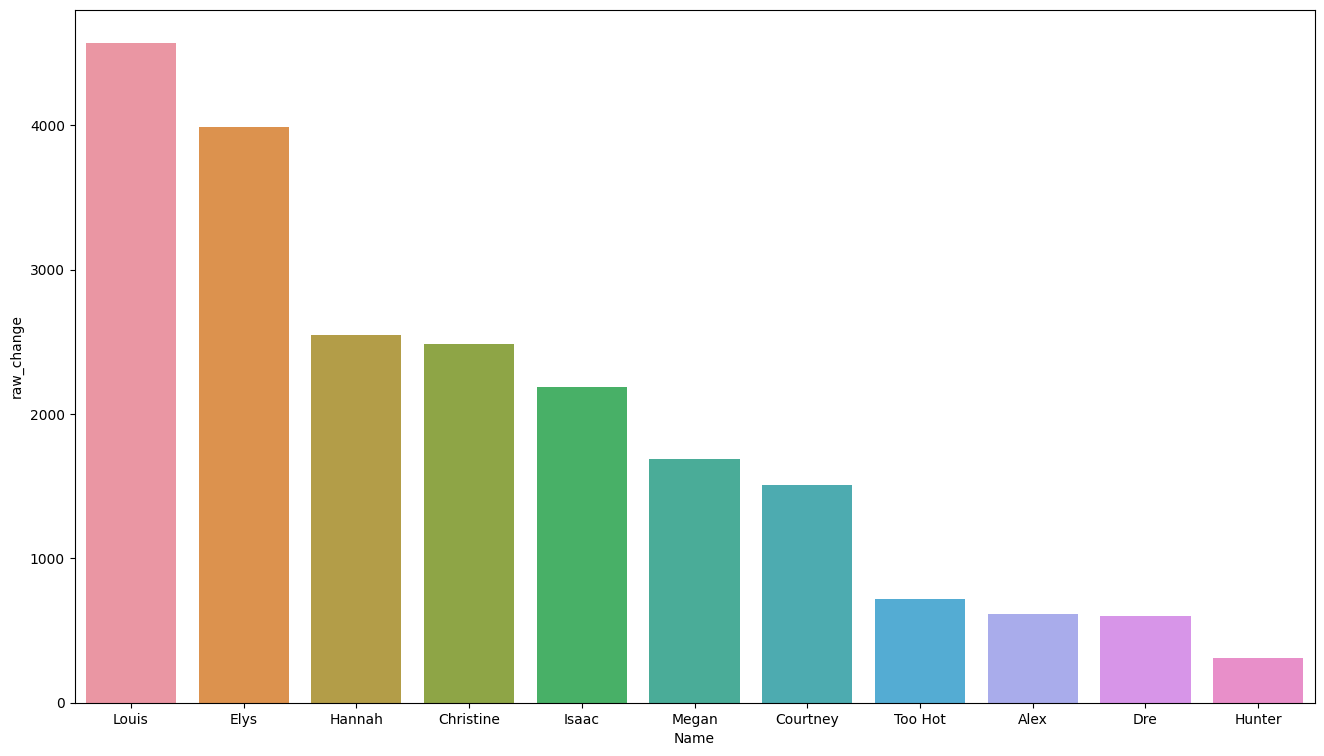

In [99]:
plt.figure(figsize=(16,9))

sns.barplot(changes_df[['Name','raw_change']].sort_values('raw_change', ascending = False), x= 'Name', y='raw_change')

In [12]:
changes_df[['Name','raw_change']].sort_values('raw_change', ascending = False).head(3)

,Name,raw_change
8,Louis,4572
5,Elys,3986
6,Hannah,2549


<Axes: xlabel='Name', ylabel='raw_change'>

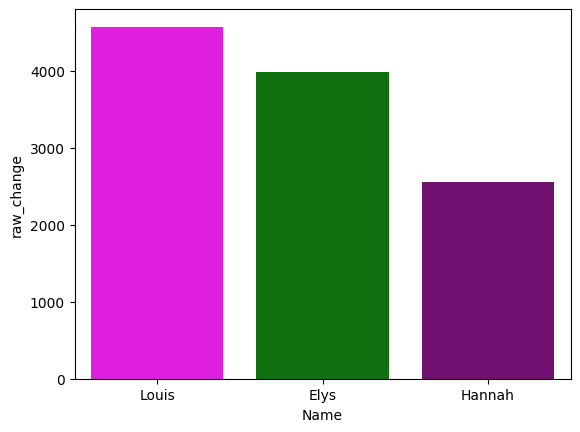

In [13]:
sns.barplot(changes_df[['Name','raw_change']].sort_values('raw_change', ascending = False).head(3), x= 'Name', y='raw_change')

The singles with the biggest net gain in followers are Louis (+4,572), Elys (+3,986), and Hannah (+2,549). Louis and Hannah were already popular, but Elys started in the middle of the pack, so it's interesting to see her rise up. This might warrant further investigation into her behavior on the show to see if there's a reason for her Instagram success.

In [14]:
changes_df[['Name','raw_change']].sort_values('raw_change', ascending = False).tail(3)

,Name,raw_change
2,Alex,616
0,Dre,604
7,Hunter,309


<Axes: xlabel='Name', ylabel='raw_change'>

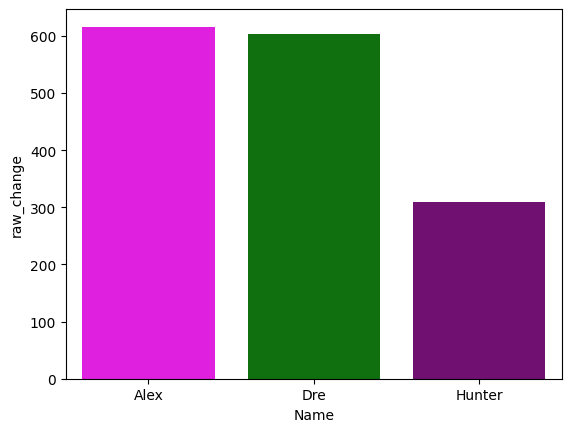

In [15]:
sns.barplot(changes_df[['Name','raw_change']].sort_values('raw_change', ascending = False).tail(3), x= 'Name', y='raw_change')

The singles with the smallest net gain at Alex (+616), Dre, (+604), and Hunter (+309). They had some of the lowest follower counts to begin with.

Now let's look at the percent change for each account.

<Axes: xlabel='Name', ylabel='percent_change'>

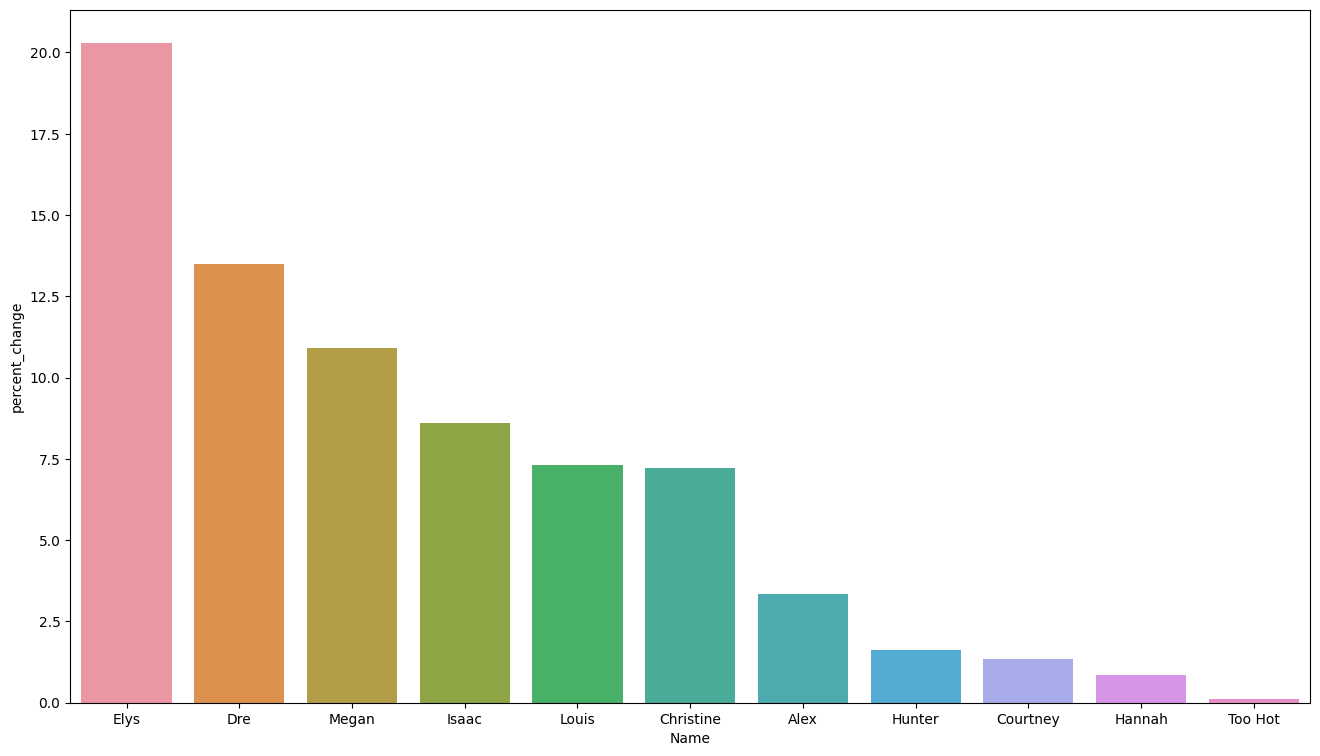

In [16]:


plt.figure(figsize=(16,9))

sns.barplot(changes_df[['Name','percent_change']].sort_values('percent_change', ascending = False), x= 'Name', y='percent_change')

In [17]:
changes_df[['Name','percent_change']].sort_values('percent_change', ascending = False).head(3)

,Name,percent_change
5,Elys,20.3
0,Dre,13.5
9,Megan,10.9


<Axes: xlabel='Name', ylabel='percent_change'>

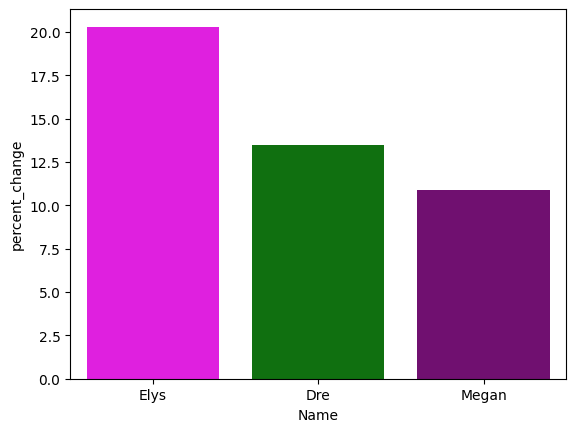

In [18]:
sns.barplot(changes_df[['Name','percent_change']].sort_values('percent_change', ascending = False).head(3), x= 'Name', y='percent_change')

The top three singles who showed the highest percent growth in followers are Elys (+20.3%), Dre (13.5%), and Megan (10.9%).

In [19]:
changes_df[['Name','percent_change']].sort_values('percent_change').head(4)

,Name,percent_change
10,Too Hot,0.11
6,Hannah,0.84
4,Courtney,1.36
7,Hunter,1.61


<Axes: xlabel='Name', ylabel='percent_change'>

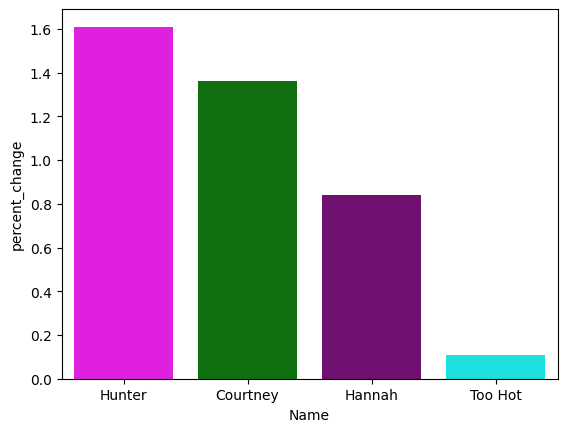

In [20]:
sns.barplot(changes_df[['Name','percent_change']].sort_values('percent_change', ascending = False).tail(4), x= 'Name', y='percent_change')

The @TooHotNetfix account saw the least percent growth.

The singles with the lowest percent growth are Hannah (+.84%), Courtney (+1.36%), and Hunter (+1.61%).



It's interesting that Hannah had the least percent growth since she started with the most followers, but this makes since since it would take more new followers for her to see the same growth as another contestant.

Similarly, it makes sense that Elys has the highest percent growth since she started with a lower follower count but had a significant net increase in followers. Notably, the other two contestants with the largest perecent growth were the two contestants with the fewest initial followers.

Let's take a look to see what the correlation between number of initial followers and percent growth is.

<Axes: xlabel='0', ylabel='percent_change'>

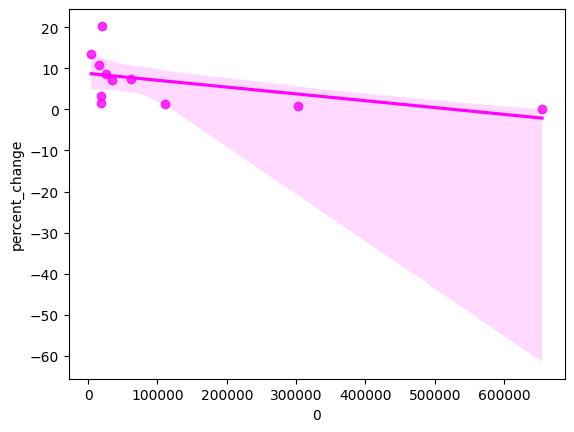

In [21]:
sns.regplot(x=first24_df.head(1), y=changes_df.percent_change)

<Axes: xlabel='0', ylabel='raw_change'>

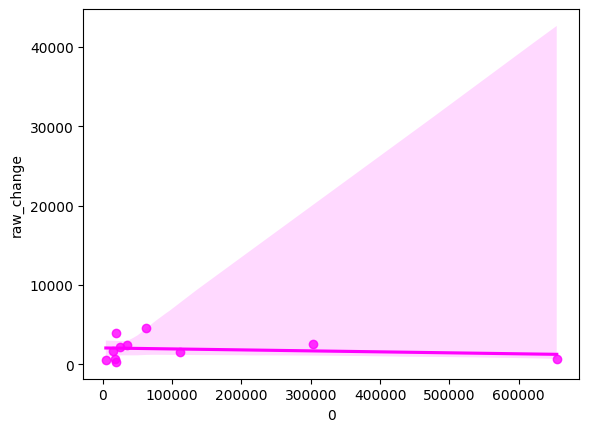

In [22]:
sns.regplot(x=first24_df.head(1), y=changes_df.raw_change)

We see a slight negative correllation between number of initial followers and both raw and percent increase.

## Feature Engineering

To get a better understanding of our data, let's create some new features. We want to look at raw change per hour and percent change per hour for each account. We'll make a new dataframes with this hourly information

In [23]:
hourly_raw_change_df = pd.DataFrame({name: [first24_df[name][i+1]-first24_df[name][i] for i in range(24)] for name in first24_df.columns})

<Axes: >

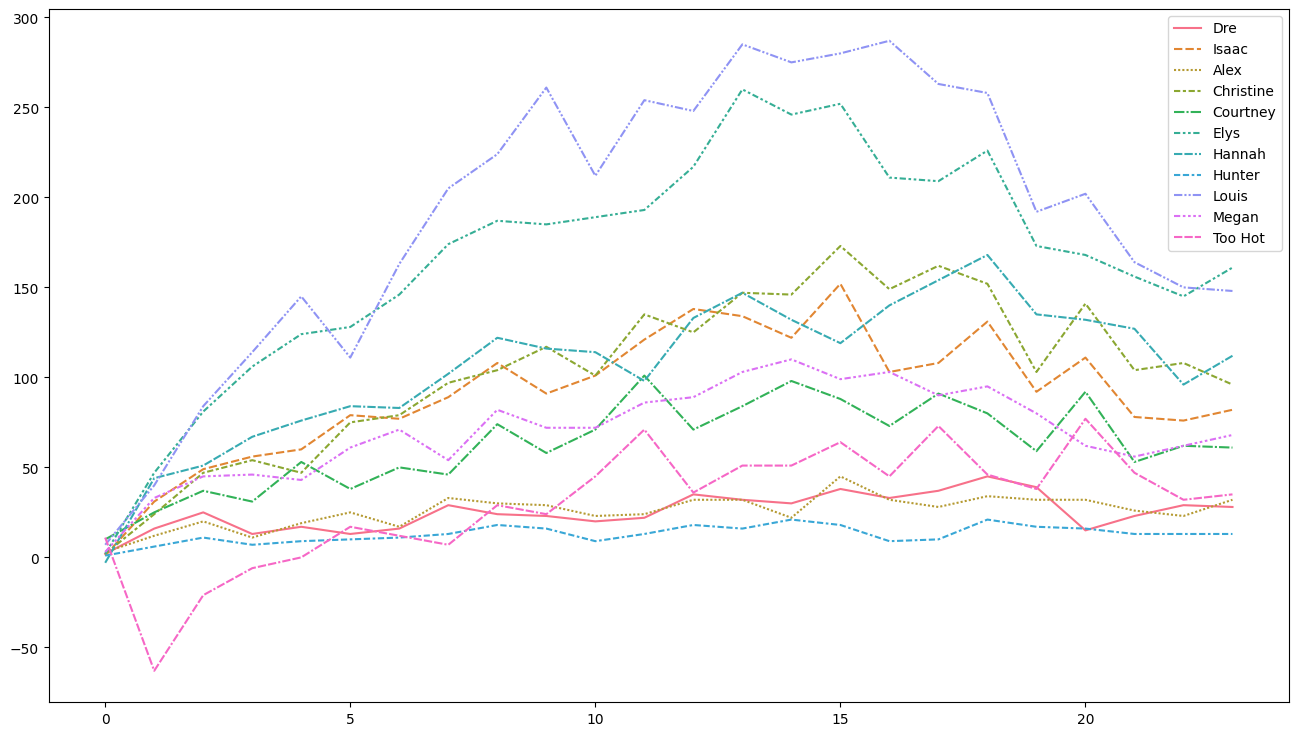

In [24]:
plt.figure(figsize=(16,9))

sns.lineplot(data=hourly_raw_change_df)


In [25]:
hourly_percent_change_df = pd.DataFrame({name: [round(100*(first24_df[name][i+1]-first24_df[name][i])/first24_df[name][i], 2) for i in range(24)] for name in first24_df.columns})


<Axes: >

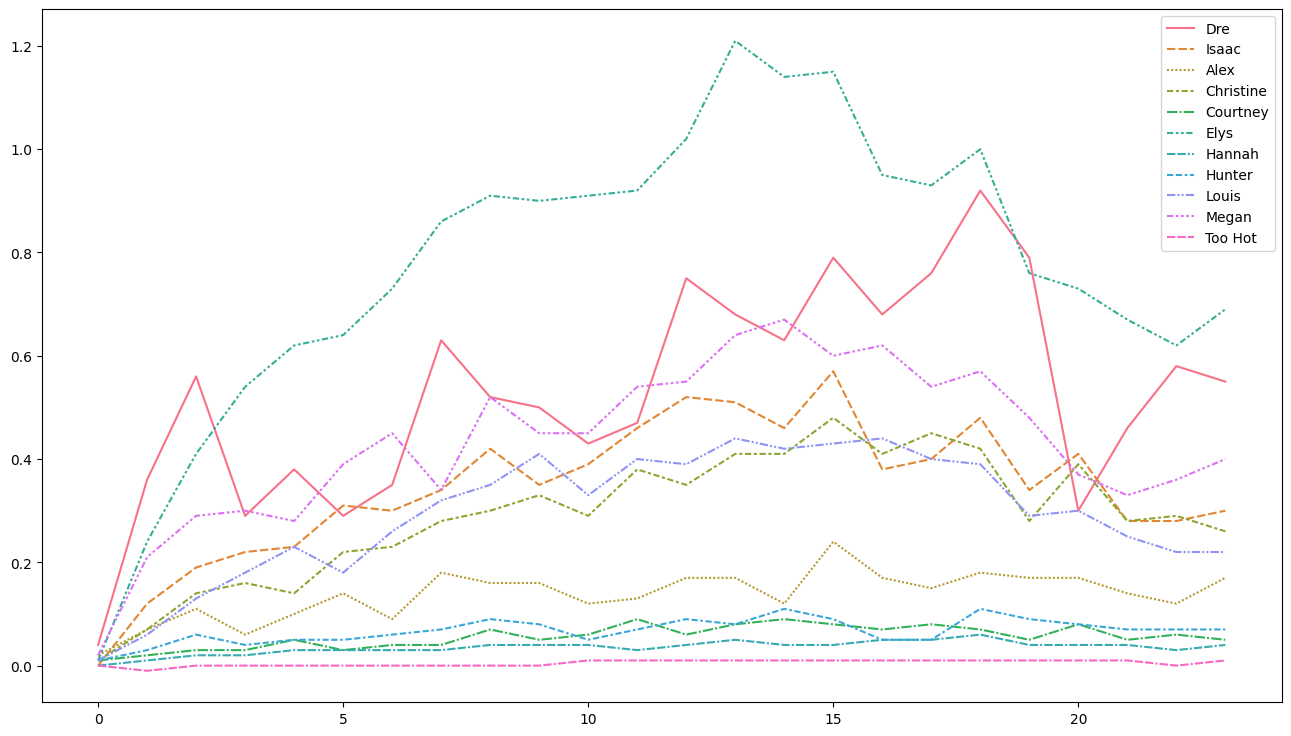

In [26]:
plt.figure(figsize=(16,9))

sns.lineplot(data=hourly_percent_change_df)


<Axes: >

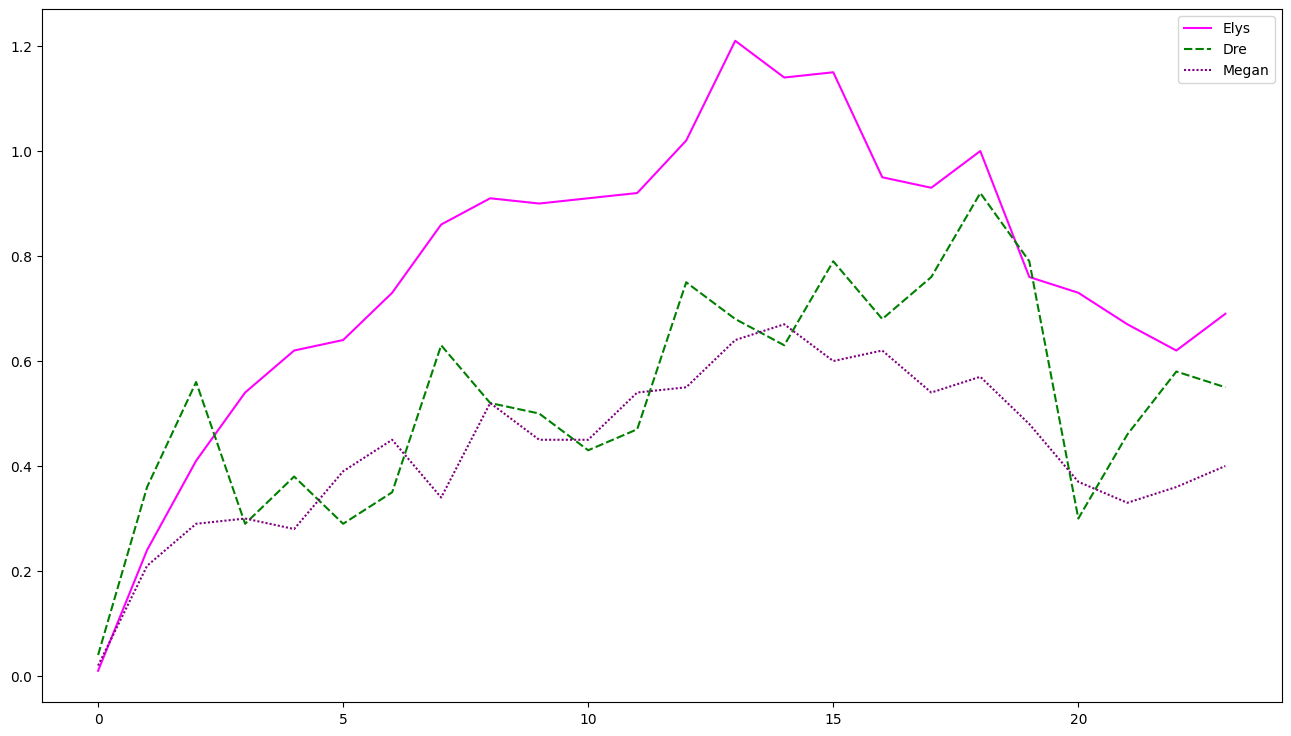

In [27]:
plt.figure(figsize=(16,9))

sns.lineplot(data=hourly_percent_change_df[['Elys','Dre','Megan']])


<Axes: >

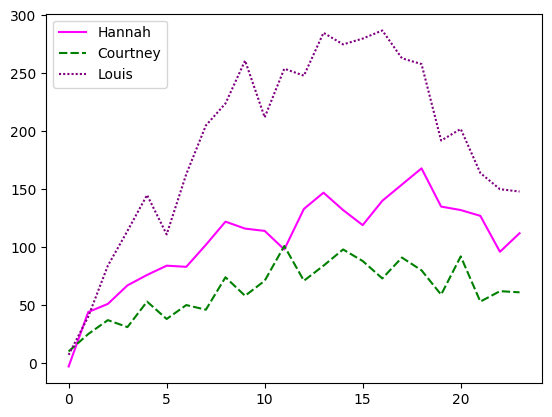

In [28]:
sns.lineplot(data=hourly_raw_change_df[['Hannah','Courtney','Louis']])


<Axes: >

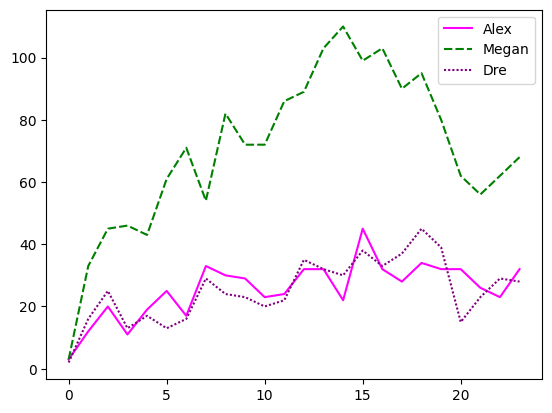

In [29]:
sns.lineplot(data=hourly_raw_change_df[['Alex','Megan','Dre']])


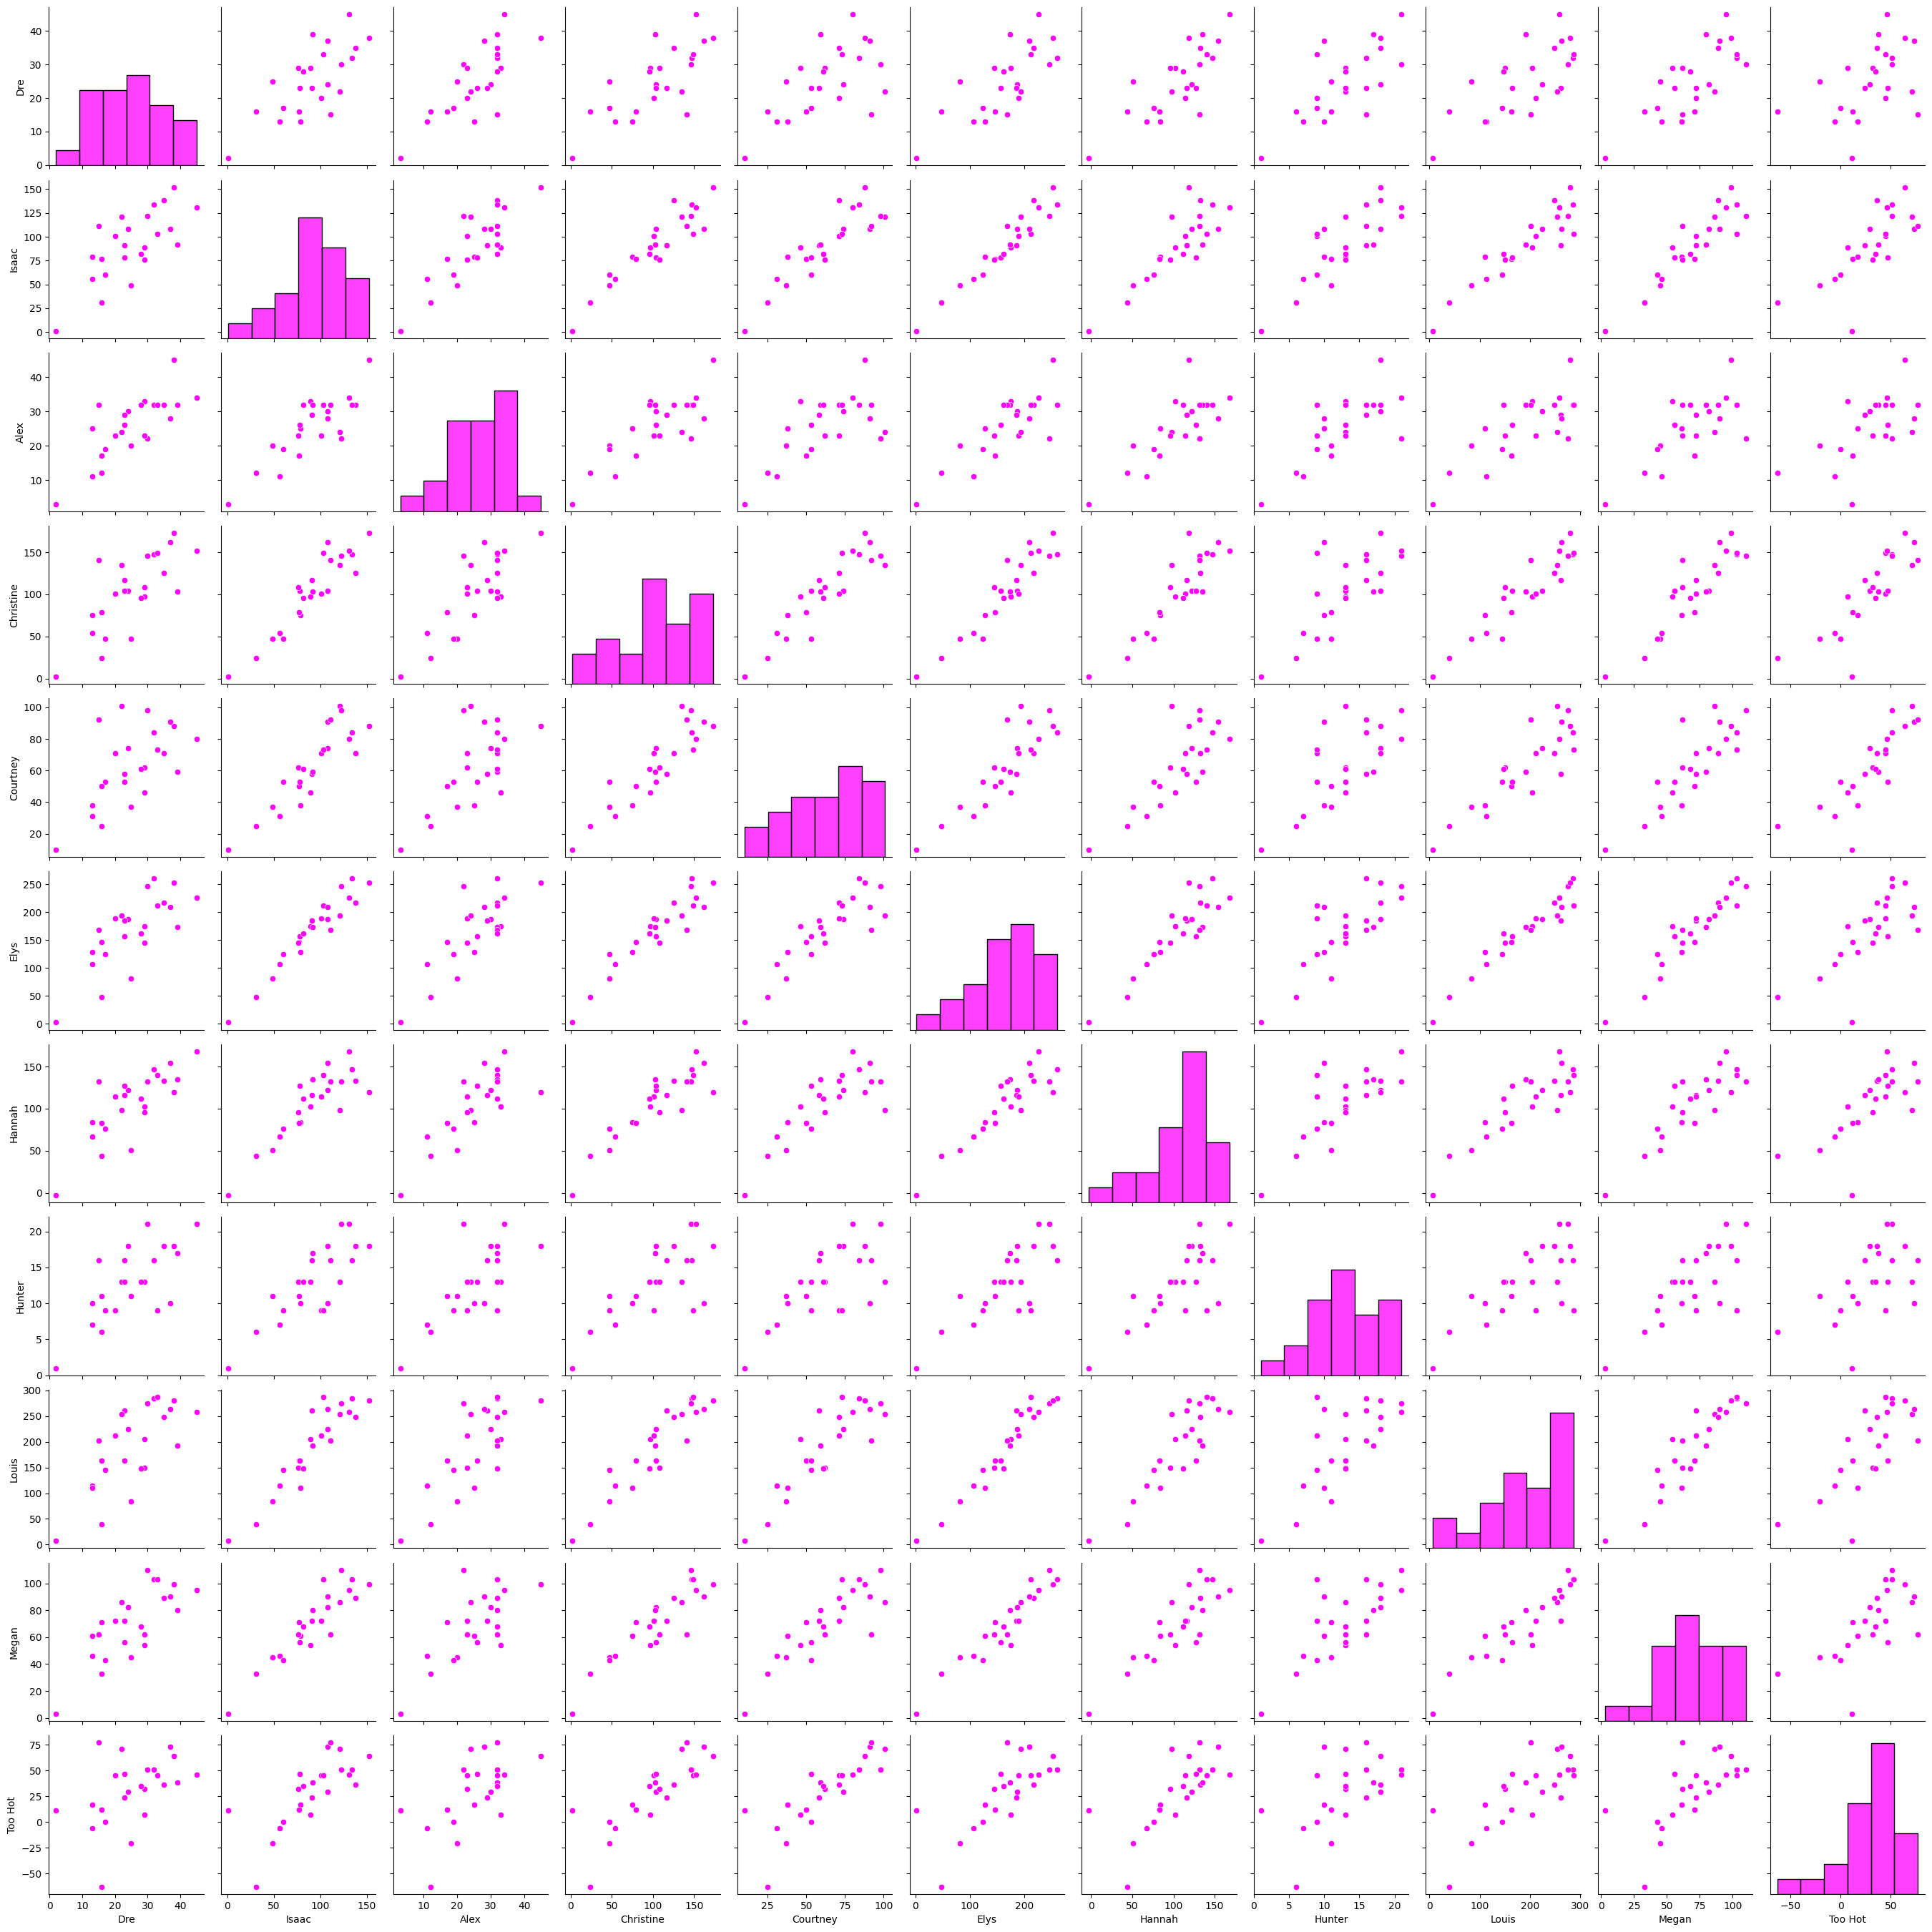

In [30]:
sns.pairplot(data=hourly_raw_change_df)

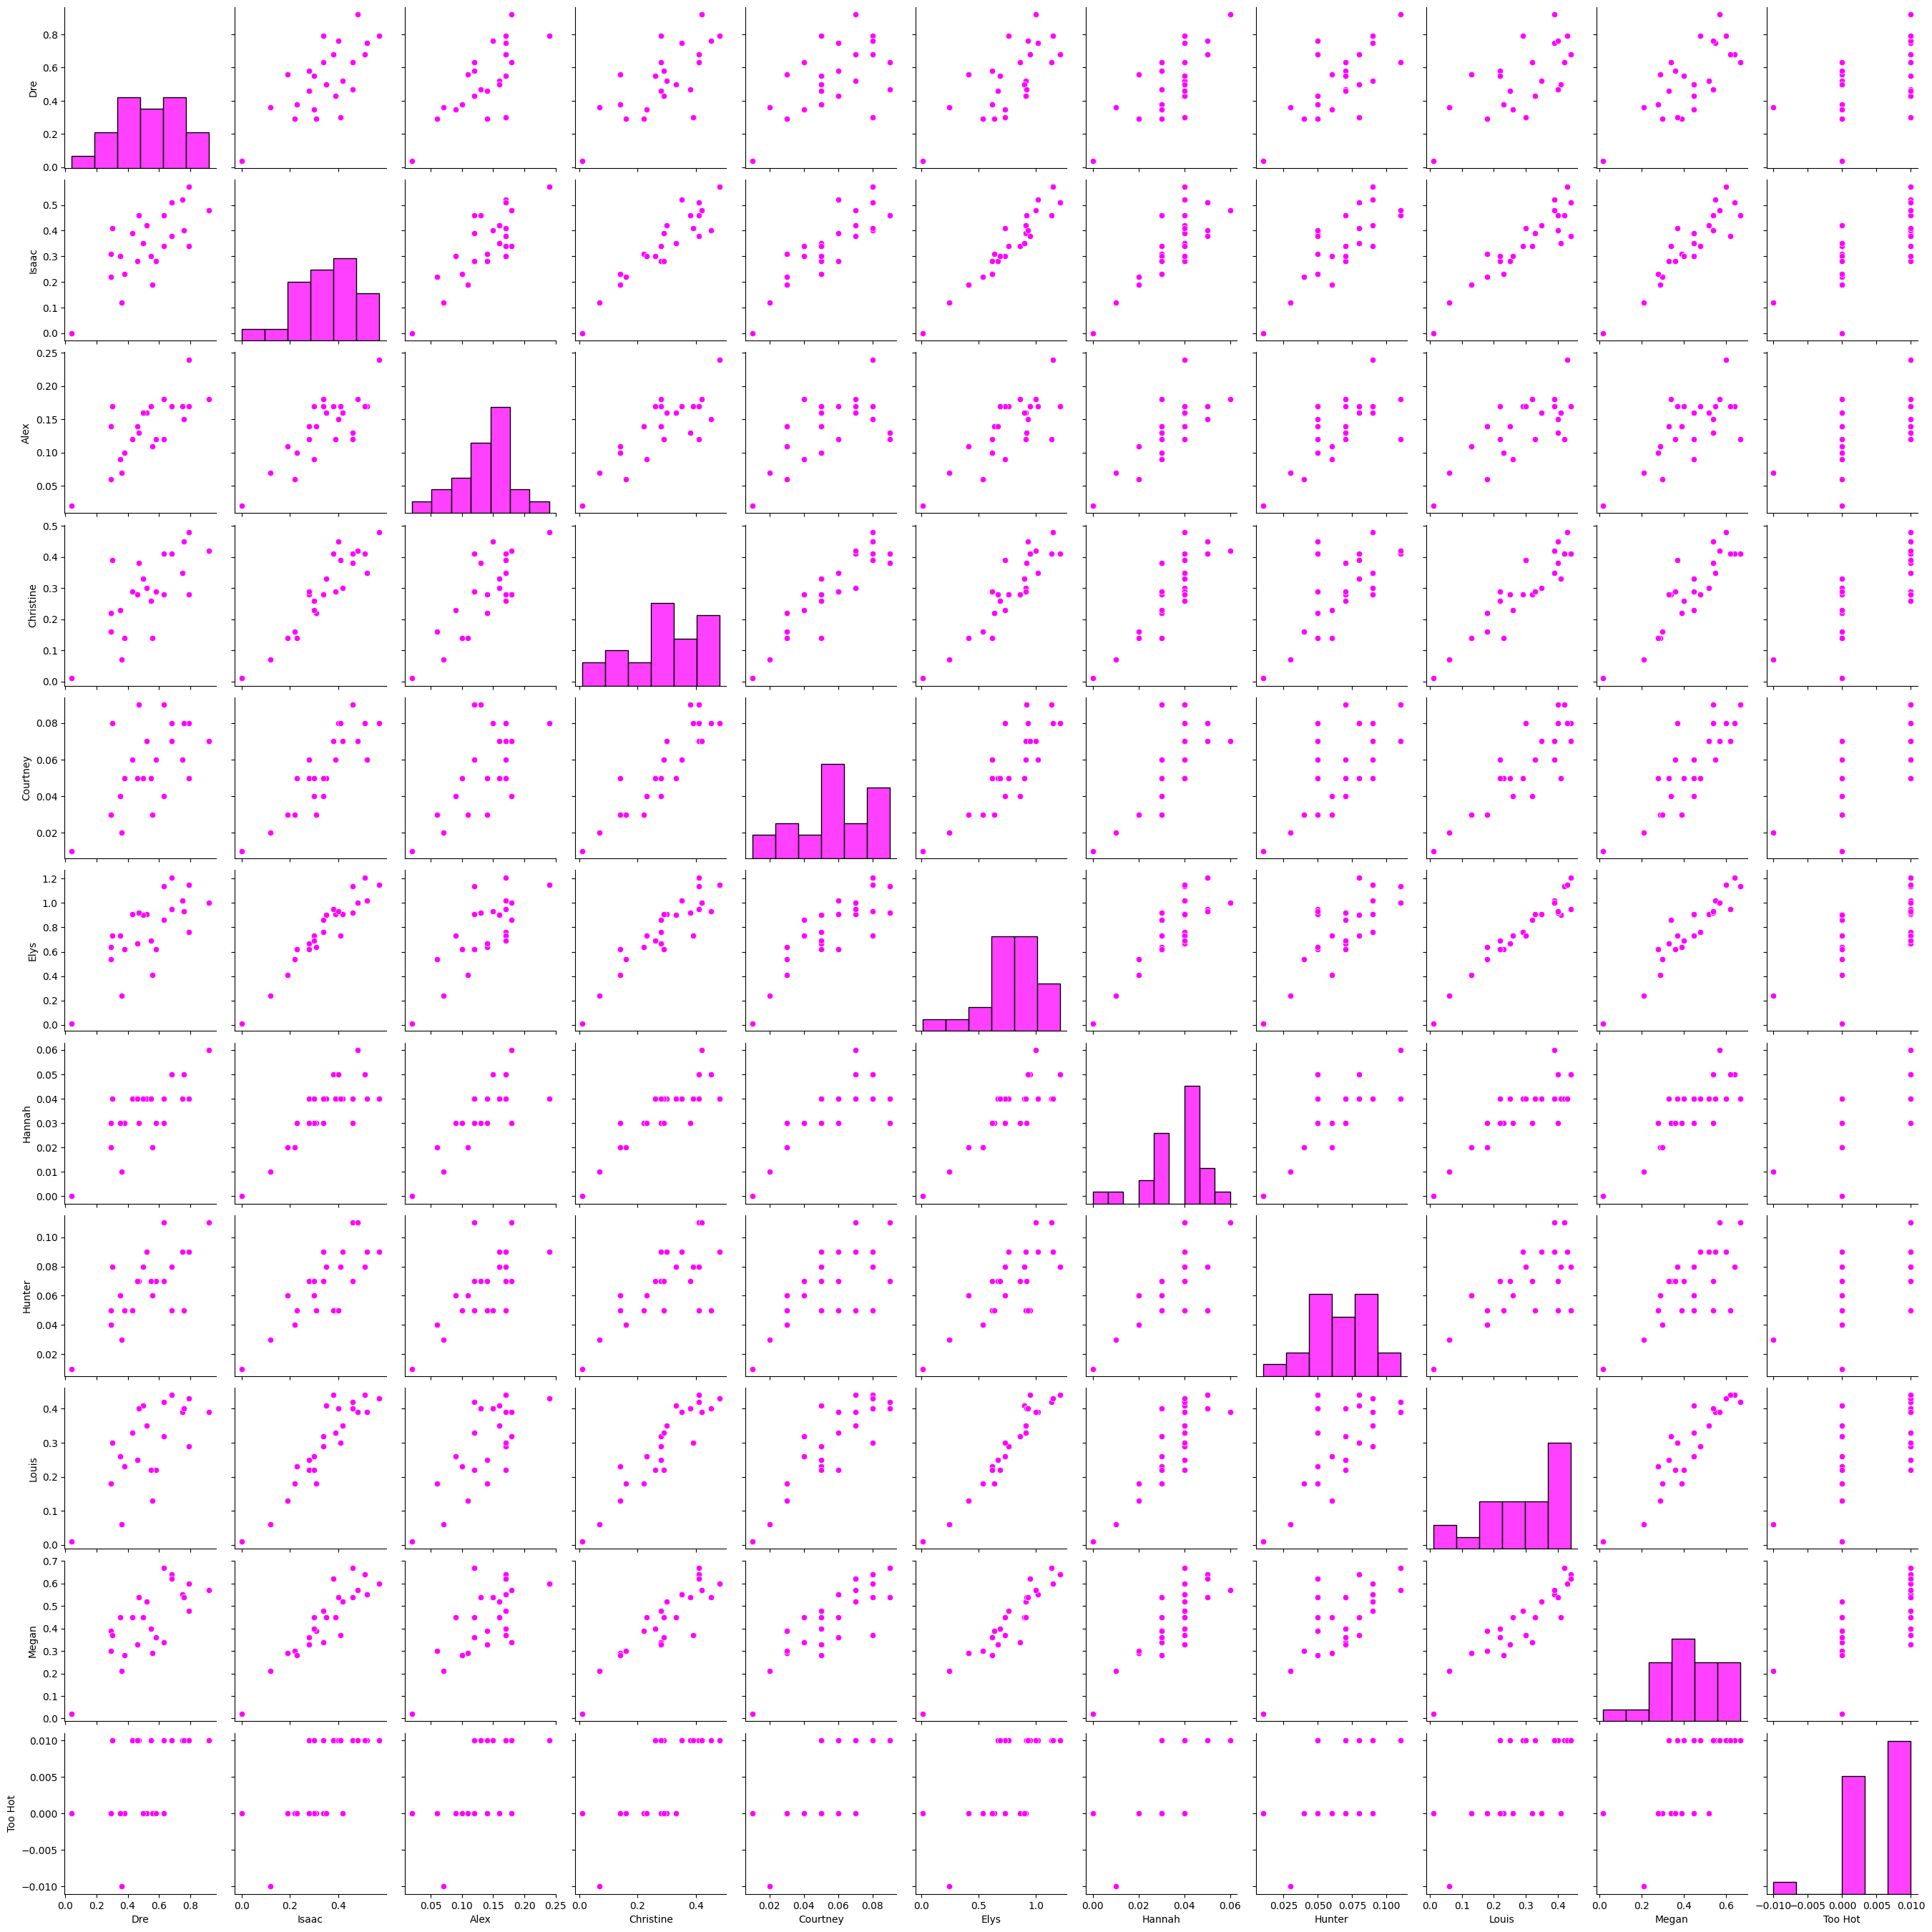

In [31]:
sns.pairplot(data=hourly_percent_change_df)

## Examining Affects of On-Screen Connections


An aspiring influencer who's decided to join the cast of a reality dating show might wonder how they should act and who they should hook up with on-screen in order to maximize their Instagram follower growth. This section will delve into the changes in follower counts based on the on-screen behavior in episodes 1-4 of the ten original contestants.

### Love Triangle: Elys, Alex, and Hunter

What are their initial follower counts?

In [112]:
eah_changes_df=changes_df.loc[changes_df.Name.isin(['Elys', 'Alex', 'Hunter'])]

eah_changes_df

,Name,init_count,raw_change,percent_change
2,Alex,18376,616,3.35
5,Elys,19631,3986,20.30
7,Hunter,19204,309,1.61


<Axes: xlabel='Name', ylabel='init_count'>

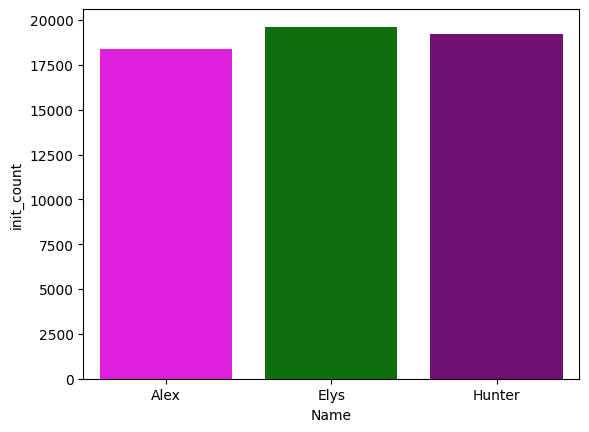

In [113]:
sns.barplot(data=eah_changes_df, y='init_count', x='Name')

<Axes: >

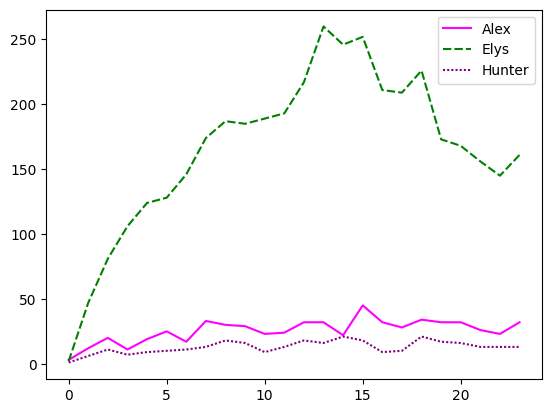

In [115]:
sns.lineplot(data=hourly_raw_change_df[['Alex','Elys','Hunter']])

<Axes: >

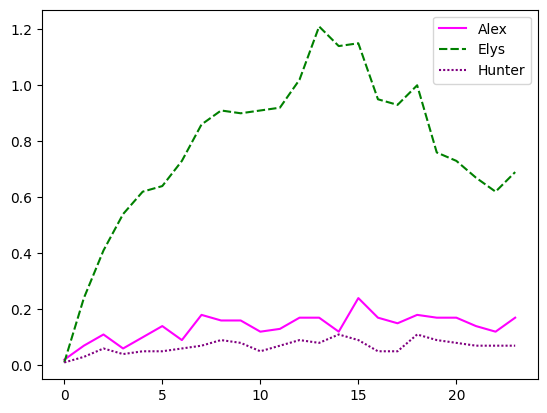

In [116]:
sns.lineplot(data=hourly_percent_change_df[['Alex','Elys','Hunter']])

<Axes: >

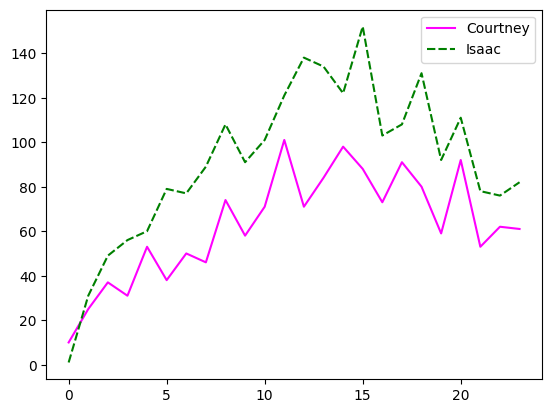

In [60]:
sns.lineplot(data=hourly_raw_change_df[['Courtney','Isaac']])

<Axes: >

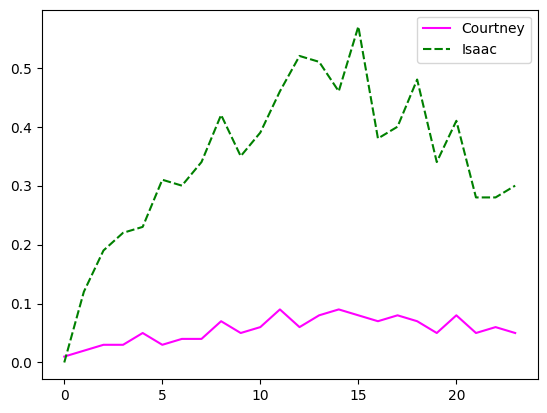

In [39]:
sns.lineplot(data=hourly_percent_change_df[['Courtney','Isaac']])